### In This NB we work with different Metrics and Distances. 
##### We will do so by working with Sierpinski triangles
![alt text](image.png)

#### Let's start by importing the necessary tools


In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
from sklearn.metrics import pairwise_distances
from IPython.display import display, clear_output
import seaborn as sns
import pandas as pd
from random import randrange

#### Next we will define the number of generations as well as the initial triangle
#### We will also create a pandas DataFrame to keep our data

In [2]:
# Define number of "point generations"
gens = 7

# Define initial triangle vertices (x,y)
a = (0, 0)
b = (1, 0)
c = (0.5, np.sqrt(3)/2)
vertices = (a, b, c)

df = pd.DataFrame(columns=['gen', 'coords'])
for point in vertices:
    df.loc[len(df)] = [0, point]

df

,gen,coords
0,0,"(0, 0)"
1,0,"(1, 0)"
2,0,"(0.5, 0.8660254037844386)"


#### Next we will plot the inital 3 points of the triangle

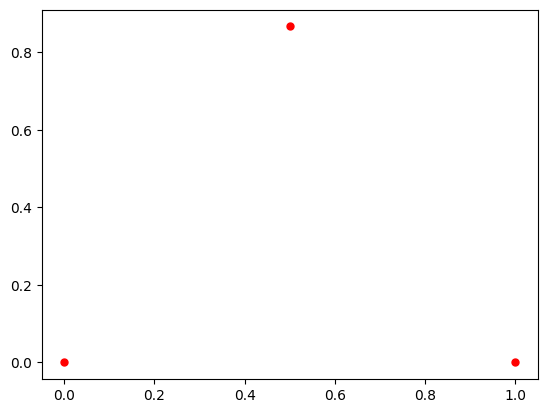

In [3]:
#plot the first triangle
fig, ax = plt.subplots()
ax.plot(*a ,'o', color = 'red', ms= 5)
ax.plot(*b ,'o', color = 'red', ms= 5)
ax.plot(*c ,'o', color = 'red', ms= 5)

##### In this part we will define a midpoint function which we will use later on to create the fractals

In [4]:
# def midpoint function for triangles, init triagles
def midpoint(a, b):
    ''' returns midpoints given 2 points of an equilateral triangle
    
    Parameters:
    a, b: tuple of x, y coordinates

    Returns:
    tuple of x, y coordinates of the midpoint
    '''
    return ((a[0] + b[0]) / 2, (a[1] + b[1]) / 2)

mid = ((a[0] + b[0] + c[0]) / 3, (a[1] + b[1] + c[1]) / 3)


triangles = [vertices]


#### Actual creation of the fractals
In this part we iteratively create the fractal triangles.\
We also plot the triangles (in different colors regarding the generation of each triangle generation)

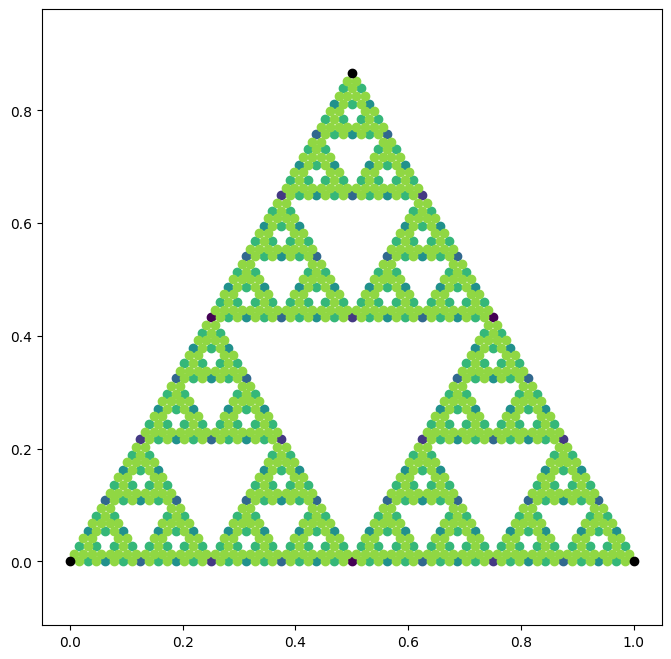

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(gens-1):
    new_triangles = []
    norm_val = i / (gens - 1)
    color = cm.viridis(norm_val)
    
    for triangle in triangles:
        A, B, C = triangle
        
        # Compute midpoints of each side
        AB_mid = midpoint(A, B)
        BC_mid = midpoint(B, C)
        CA_mid = midpoint(C, A)
        
        ax.scatter(*zip(*[AB_mid, BC_mid, CA_mid]), color=color, marker='o')
        
        new_triangles.extend([
            (A, AB_mid, CA_mid),
            (AB_mid, B, BC_mid),
            (CA_mid, BC_mid, C)
        ])

        # Add the points to df for distance calculations
        new_points = pd.DataFrame({'gen': [i + 1] * 3,'coords': [AB_mid, BC_mid, CA_mid]})
        df = pd.concat([df, new_points], ignore_index=True)
    
    # Update the list of triangles for the next generation
    triangles = new_triangles

ax.scatter(*zip(*vertices), color='black', marker='o')

plt.axis('equal')
plt.show()


#### Next we'll have a look on what the resulting df looks like and 

In [6]:
print(df.shape)
df.head()

(1095, 2)


,gen,coords
0,0,"(0, 0)"
1,0,"(1, 0)"
2,0,"(0.5, 0.8660254037844386)"
3,1,"(0.5, 0.0)"
4,1,"(0.75, 0.4330127018922193)"


## Calculation of Distances
As we have all points calculated it is now time to also calculate the distances between them.\
We calculate the 4 given distances: Euclidian, Minkow, Manhatten and the "Generation-Distance"

In [7]:
# Calculate all pairwise distances between all points
euclid = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2))

minkow = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2), metric='minkowski')

manhatten = pairwise_distances(np.array(df['coords'].tolist()).reshape(-1, 2), metric='manhattan')

generation = pairwise_distances(np.array(df['gen'].tolist()).reshape(-1, 1) )

euclid

array([[0.        , 1.        , 1.        , ..., 0.97665625, 0.99227977,
        0.984375  ],
       [1.        , 0.        , 1.        , ..., 0.97665625, 0.984375  ,
        0.99227977],
       [1.        , 1.        , 0.        , ..., 0.02706329, 0.015625  ,
        0.015625  ],
       ...,
       [0.97665625, 0.97665625, 0.02706329, ..., 0.        , 0.015625  ,
        0.015625  ],
       [0.99227977, 0.984375  , 0.015625  , ..., 0.015625  , 0.        ,
        0.015625  ],
       [0.984375  , 0.99227977, 0.015625  , ..., 0.015625  , 0.015625  ,
        0.        ]])

### Plotting the Distances
As we now have all the distances calculated, what we do next is plotting the distance matrizes

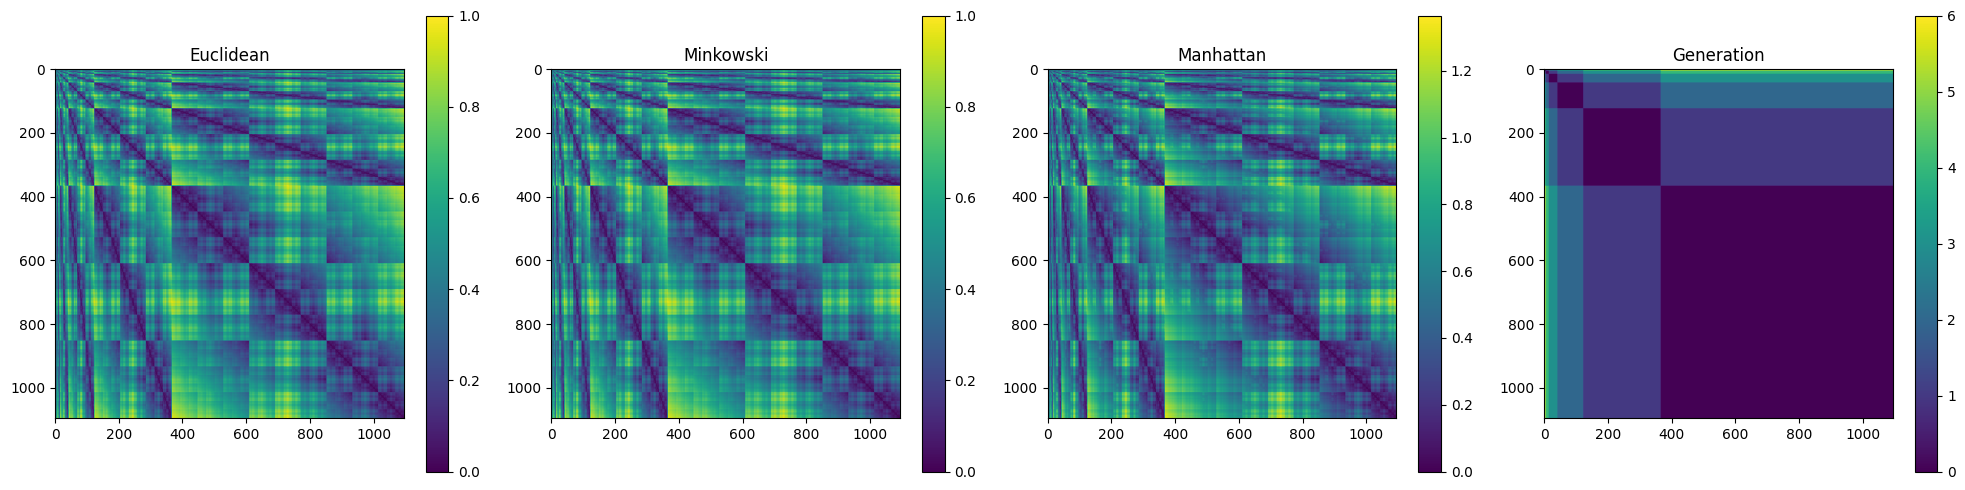

In [8]:
# Create a figure with 1 row and 4 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot Euclidean distances
im0 = axs[0].imshow(euclid, cmap='viridis')
axs[0].set_title("Euclidean")
fig.colorbar(im0, ax=axs[0])

# Plot Minkowski distances
im1 = axs[1].imshow(minkow, cmap='viridis')
axs[1].set_title("Minkowski")
fig.colorbar(im1, ax=axs[1])

# Plot Manhattan distances
im2 = axs[2].imshow(manhatten, cmap='viridis')
axs[2].set_title("Manhattan")
fig.colorbar(im2, ax=axs[2])

# Plot Generation distances
im3 = axs[3].imshow(generation, cmap='viridis')
axs[3].set_title("Generation")
fig.colorbar(im3, ax=axs[3])

plt.tight_layout()
plt.show()


##### Although this gives some insights, it's hard to detect all the distances between the points and get a feeling for it.
So let's try something different.\
We will plot the distances 

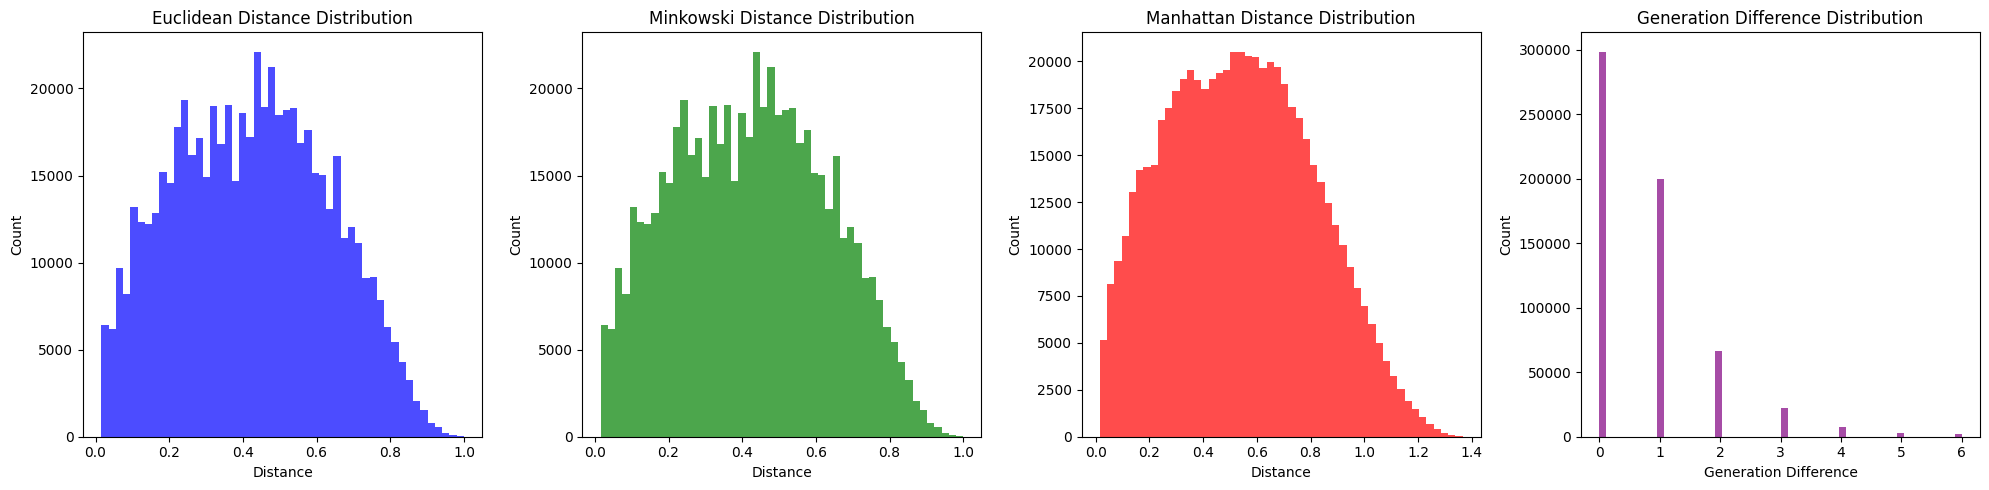

In [9]:
def get_upper_triangle_values(matrix):
    # Get indices for the upper triangle (excluding the diagonal)
    triu_indices = np.triu_indices_from(matrix, k=1)
    return matrix[triu_indices]

# Extract upper triangle values for each distance matrix
euclid_values = get_upper_triangle_values(euclid)
minkow_values = get_upper_triangle_values(minkow)
manhatten_values = get_upper_triangle_values(manhatten)
generation_values = get_upper_triangle_values(generation)

# Create a figure with 1 row and 4 columns of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].hist(euclid_values, bins=50, color='blue', alpha=0.7)
axs[0].set_title('Euclidean Distance Distribution')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Count')

axs[1].hist(minkow_values, bins=50, color='green', alpha=0.7)
axs[1].set_title('Minkowski Distance Distribution')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Count')

axs[2].hist(manhatten_values, bins=50, color='red', alpha=0.7)
axs[2].set_title('Manhattan Distance Distribution')
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Count')

axs[3].hist(generation_values, bins=50, color='purple', alpha=0.7)
axs[3].set_title('Generation Difference Distribution')
axs[3].set_xlabel('Generation Difference')
axs[3].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
#max of each distance
max_euclid = euclid.max()
max_minkow = minkow.max()
max_manhatten = manhatten.max()
max_generation = generation.max()

print(f"Max Euclidean distance: {max_euclid}")
print(f"Max Minkowski distance: {max_minkow}")
print(f"Max Manhattan distance: {max_manhatten}")
print(f"Max Generation distance: {max_generation}")

Max Euclidean distance: 1.0
Max Minkowski distance: 1.0
Max Manhattan distance: 1.3660254037844386
Max Generation distance: 6.0


In [11]:
#min of each distance
min_euclid = euclid.min()
min_minkow = minkow.min()
min_manhatten = manhatten.min()
min_generation = generation.min()

print(f"Min Euclidean distance: {min_euclid}")
print(f"Min Minkowski distance: {min_minkow}")
print(f"Min Manhattan distance: {min_manhatten}")
print(f"Min Generation distance: {min_generation}")

Min Euclidean distance: 0.0
Min Minkowski distance: 0.0
Min Manhattan distance: 0.0
Min Generation distance: 0.0


#### Let's visualize this a bit better
To do so we first plot the max and min values color-coded into the triangle.
While doing this we will skip the diagonal values of the distance matrix to get a bit more insights (obviously the distance of a point to itself will be 0)\
we will also print the "real" max and min distances

Euclidean distances: Min = 0.015624999999996447, Max = 1.0
Minkowski distances: Min = 0.015624999999999936, Max = 1.0
Manhattan distances: Min = 0.015625, Max = 1.3660254037844386
Generation distances: Min = 0.0, Max = 6.0


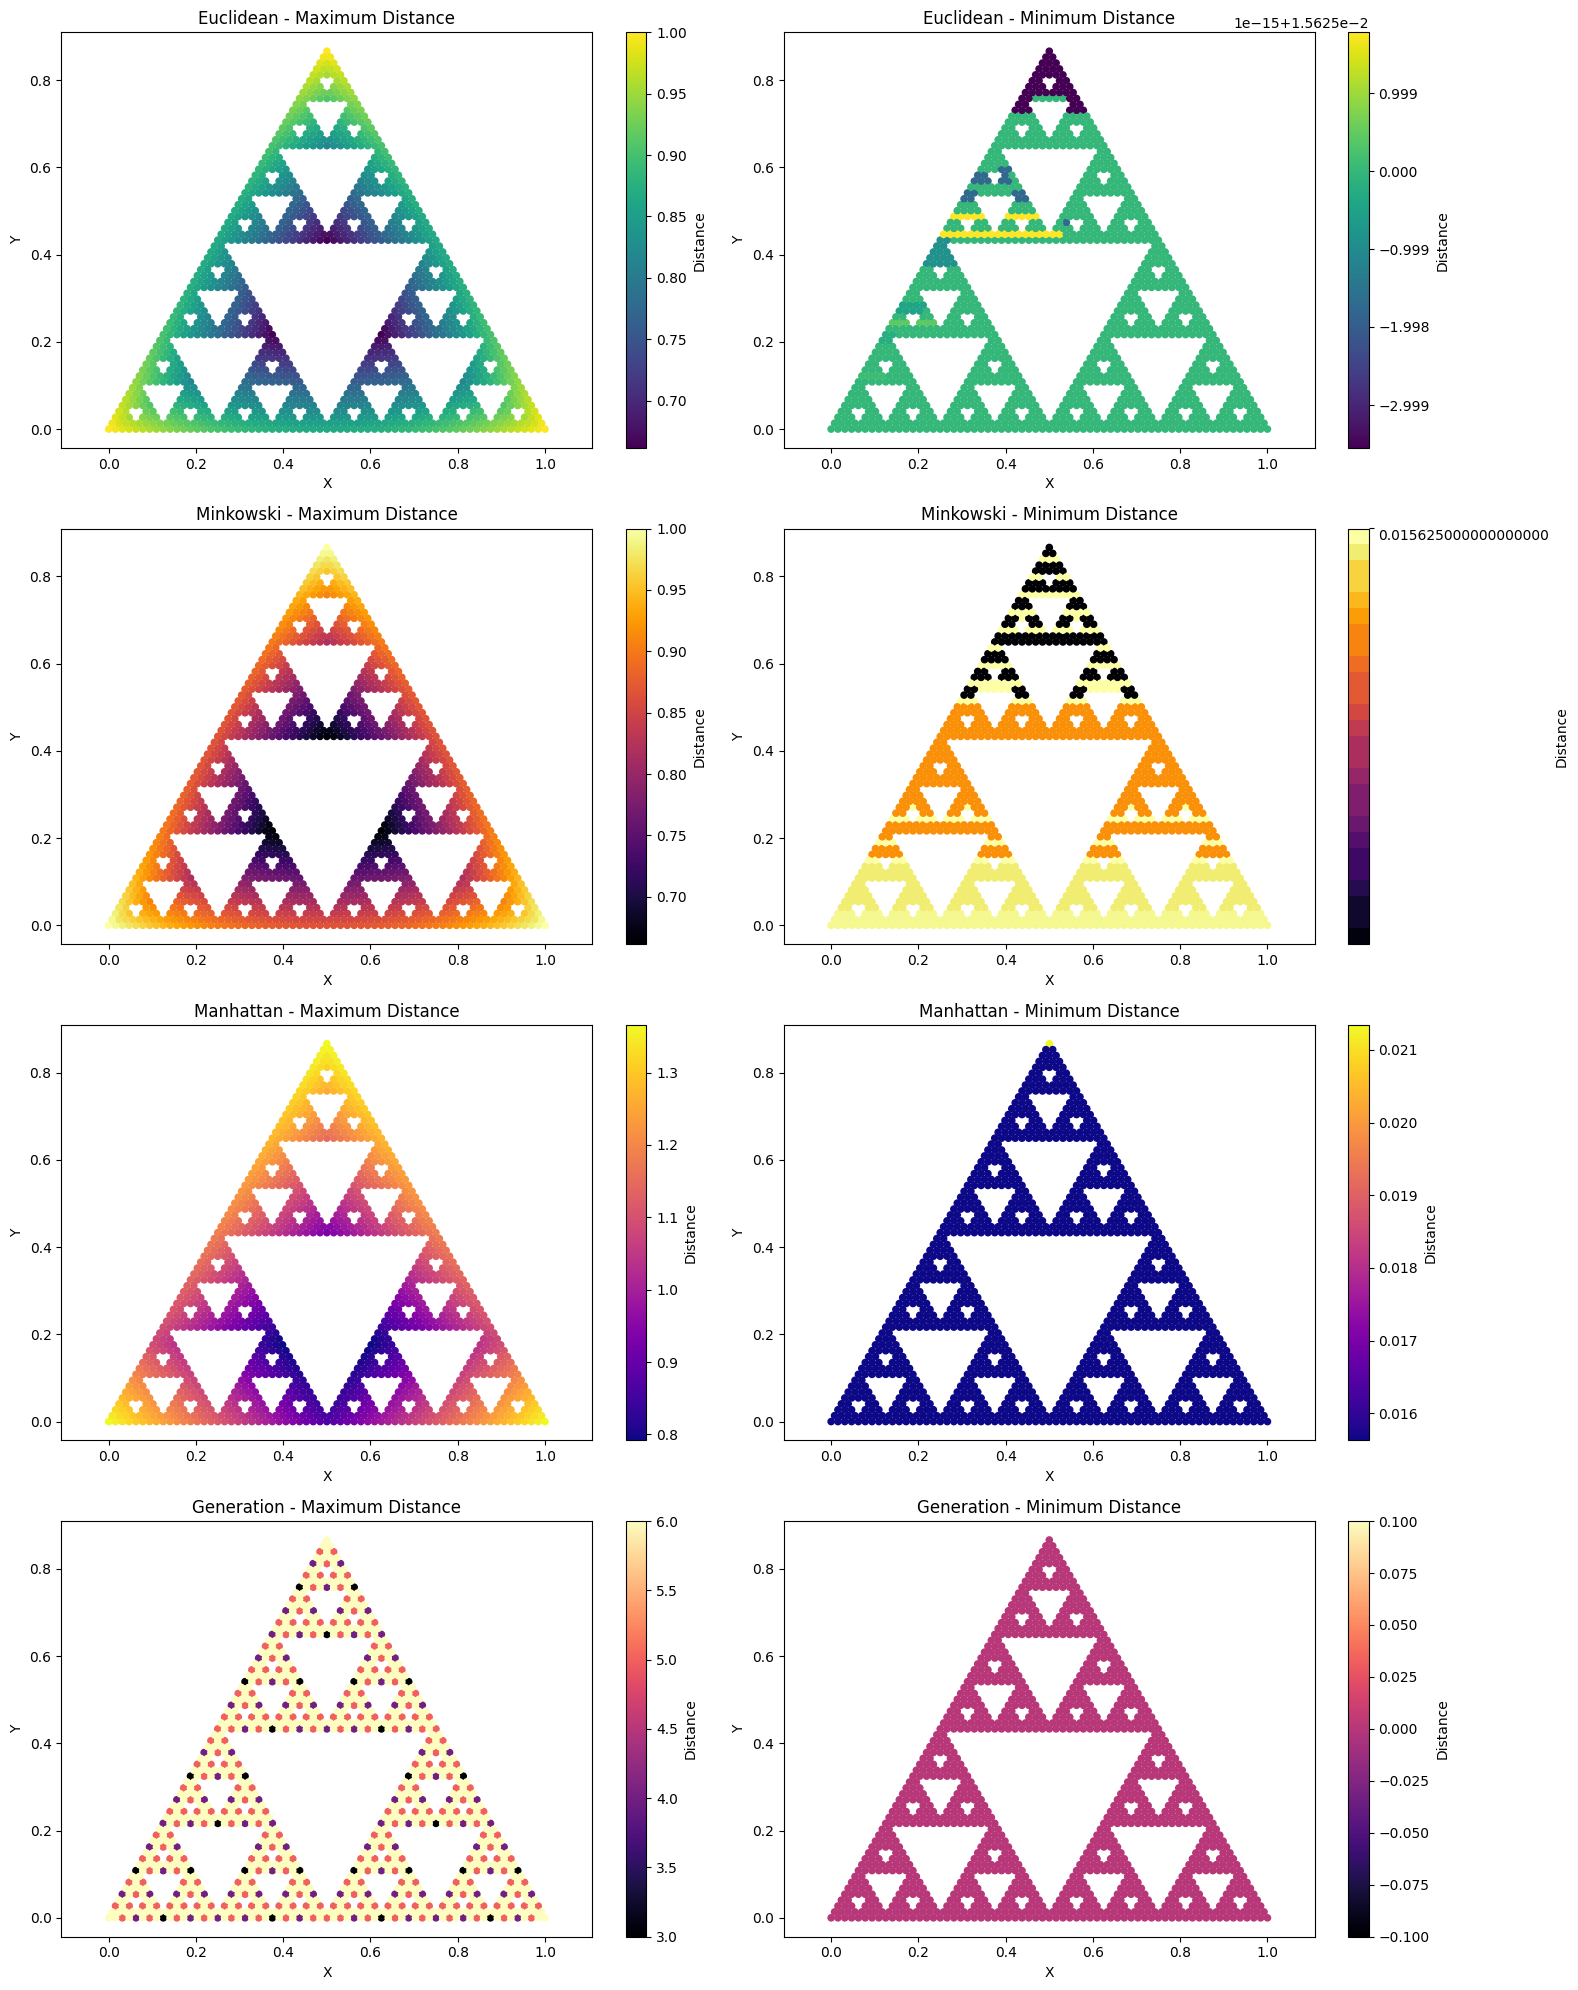

In [12]:
def compute_min_max(dist_matrix):
    """
    Given a square distance matrix, returns two arrays:
    - d_min: the minimum distance (excluding self-distance)
    - d_max: the maximum distance (excluding self-distance)
    """
    dmin_mat = dist_matrix.copy()
    dmax_mat = dist_matrix.copy()
    # Exclude self-distance for min by setting the diagonal to infinity.
    np.fill_diagonal(dmin_mat, np.inf)
    # Exclude self-distance for max by setting the diagonal to -infinity.
    np.fill_diagonal(dmax_mat, -np.inf)
    d_min = np.min(dmin_mat, axis=1)
    d_max = np.max(dmax_mat, axis=1)
    return d_min, d_max

# Convert the coordinates from df['coords'] into a 2D array.
points = np.vstack(df['coords'].tolist())

# Define the metrics with the colormap to be used.
metrics = {
    'Euclidean': {'metric': 'euclidean', 'cmap': 'viridis'},
    'Minkowski': {'metric': 'minkowski', 'cmap': 'inferno'},
    'Manhattan': {'metric': 'manhattan', 'cmap': 'plasma'},
    'Generation': {'metric': 'generation', 'cmap': 'magma'}
}

# Create one row per metric and 2 columns (max and min plots).
n_metrics = len(metrics)
fig, axes_array = plt.subplots(n_metrics, 2, figsize=(16, 5 * n_metrics))
axes_array = np.atleast_2d(axes_array)

for i, (name, params) in enumerate(metrics.items()):
    if name == 'Generation':
        # Compute distances using generation numbers.
        gen_values = np.array(df['gen'].tolist()).reshape(-1, 1)
        dist_matrix = pairwise_distances(gen_values)
    else:
        # Compute distances using spatial coordinates.
        dist_matrix = pairwise_distances(points, metric=params['metric'])
    
    # Compute the minimum and maximum distances (excluding self-distance).
    d_min, d_max = compute_min_max(dist_matrix)
    print(f"{name} distances: Min = {d_min.min()}, Max = {d_max.max()}")
    
    # Prepare normalized color scales.
    norm_min = mcolors.Normalize(vmin=d_min.min(), vmax=d_min.max())
    norm_max = mcolors.Normalize(vmin=d_max.min(), vmax=d_max.max())
    
    # Plot points colored by maximum distances first (left column).
    sc_max = axes_array[i, 0].scatter(points[:, 0], points[:, 1],
                                      c=d_max, cmap=params['cmap'],
                                      norm=norm_max, s=20)
    axes_array[i, 0].set_title(f'{name} - Maximum Distance')
    axes_array[i, 0].set_xlabel('X')
    axes_array[i, 0].set_ylabel('Y')
    axes_array[i, 0].axis('equal')
    fig.colorbar(sc_max, ax=axes_array[i, 0], label='Distance')
    
    # Plot points colored by minimum distances next (right column).
    sc_min = axes_array[i, 1].scatter(points[:, 0], points[:, 1],
                                      c=d_min, cmap=params['cmap'],
                                      norm=norm_min, s=20)
    axes_array[i, 1].set_title(f'{name} - Minimum Distance')
    axes_array[i, 1].set_xlabel('X')
    axes_array[i, 1].set_ylabel('Y')
    axes_array[i, 1].axis('equal')
    fig.colorbar(sc_min, ax=axes_array[i, 1], label='Distance')

plt.tight_layout()
plt.show()


## Playground (don't mind this)

In [13]:
#for each generation....
spielwiese = False

if spielwiese:
    for i in range(gens-1):
        midpoints =[midpoint(p1,p2) for p1,p2 in itertools.combinations(df['coords'], 2)]
        
        # Calculating new midpiints that are not already in the dataframe 
        existing_points = set(df['coords'])
        unique_midpoints = [m for m in midpoints if m not in existing_points]
        unique_midpoints = list({m for m in unique_midpoints})
        new_points = pd.DataFrame({'gen': i + 1, 'coords': unique_midpoints})

        print(new_points)

        #coloring in verdis style
        norm_val = i / (gens - 1)
        color = cm.viridis(norm_val)

        # plotting the new points
        ax.scatter(*zip(*unique_midpoints), color=(color), marker='o')

        #adding them to the df
        df = pd.concat([df, new_points], ignore_index=True)


    display(fig)
    df